**1.Geospatial Analysis: Visualizing Total Subscribers by Country**

**EXPLANATION:-** DataFrame is aggregated by country,summing up the total no.of subscribers & video views. Then we use the aggregated data to construct a choropleth map, with each country represented by a colored region whose shade corresponds to the total number of subscribers. Hovering over each country displays the country name & total subscribers

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')


country_data = data.groupby('Country').agg({'subscribers': 'sum', 'video views': 'sum'}).reset_index()


fig = px.choropleth(country_data, locations='Country', locationmode='country names', color='subscribers',
                    hover_name='Country', projection='natural earth',
                    title='Total Subscribers by Country')
fig.show()

**2.Determining top 10 youtube channels with the most subscribers**

**CODE EXPLANATION:-**We use Plotly Express to create a horizontal bar chart visualizing the top 10 YouTube channels by subscribers. Firstly,'nan' values are replaced with pandas' NA for numeric columns. After the replacement of 'nan' values with NA , the columns containing numerical data are converted to their respective numeric data types. This ensures that all numeric values in the dataset are treated consistently and can be properly analyzed or visualized. Rows containing NaN values are then dropped from the DataFrame. The top 10 YouTube channels with the highest subscriber counts are selected using the `nlargest()` function. Plotly Express is then employed to generate the horizontal bar chart (`px.bar`) with the selected channels, where each bar represents a channel's subscriber count.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/Global YouTube Statistics.csv",encoding="latin-1")
df_cleaned = df.replace('nan', pd.NA)  # Replace 'nan' with pandas' NA for numeric columns
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna()

top_10_subscribers = df_cleaned.nlargest(10, 'subscribers')

fig1 = px.bar(top_10_subscribers, x='subscribers', y='Youtuber', orientation='h', text='subscribers',
              color='subscribers', labels={'subscribers': 'Subscribers (in millions)'},
              color_continuous_scale='Viridis')
fig1.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
                    opacity=0.8, textposition='inside')
fig1.update_layout(title_text='Top 10 YouTube Channels by Subscribers', yaxis_title='YouTube Channel',
                   xaxis_title='Subscribers (in millions)', height=500)
fig1.show()

**3.Investigate the Correlation between Subscribers, Video Views, and Uploads among YouTube Channels**

**CODE EXPLANATION:-**here we construct a 3D scatter plot using Plotly Graph Objects. It utilizes data from the DataFrame `df_cleaned`, with the 'subscribers', 'video views', and 'uploads' columns assigned to the x, y, and z axes, respectively. Each data point is represented as a marker in the 3D space, and various attributes are specified for these markers. These attributes include their size, color, and opacity, with the color of each marker determined by the values in the 'video_views_for_the_last_30_days' column. A color scale ('Viridis') is applied to visualize the range of values effectively.So we basically explore the relationship between subscribers, video views, and uploads across YouTube channels in a three-dimensional space.

In [ ]:
import plotly.express as px
import pandas as pd

fig1 = go.Figure(data=go.Scatter3d(
    x=df_cleaned['subscribers'],
    y=df_cleaned['video views'],
    z=df_cleaned['uploads'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_cleaned['video_views_for_the_last_30_days'],
        colorscale='Viridis',
        opacity=0.7
    )
))

fig1.update_layout(title='YouTube Channels: Subscribers, Video Views, and Uploads',
                   scene=dict(xaxis_title='x=Subscribers', yaxis_title='y=Video Views', zaxis_title='z=Uploads'),
                   margin=dict(l=0, r=0, b=0, t=30))
fig1.show()

**4.Explore the relationship between subscribers and video views of different categories**

**CODE EXPLANATION:-** we create a scatter plot using Plotly Express,  focusing on the relationship between subscribers and video views across YouTube channels. The data from the df_cleaned DataFrame is utilized, with 'subscribers' and 'video views' columns assigned to the x and y axes, respectively. Each data point in the scatter plot represents a YouTube channel, and additional attributes such as size and color are applied for enhanced visualization. The size of each marker corresponds to the 'video_views_for_the_last_30_days' column, providing a visual representation of video views over the last 30 days. Moreover, the color of each marker is determined by the 'category' column, allowing for categorical differentiation between YouTube channels. Additional information, such as the channel name ('Youtuber') and country, is displayed when hovering over each marker.

In [ ]:
import plotly.express as px
import pandas as pd

#  Scatter plot for subscribers vs. video views with size and color encoding
fig3 = px.scatter(df_cleaned, x='subscribers', y='video views', size='video_views_for_the_last_30_days',
                  color='category', hover_name='Youtuber', hover_data=['Country'], size_max=40,
                  labels={'subscribers': 'Subscribers ', 'video views': 'Video Views'},
                  color_discrete_sequence=px.colors.qualitative.Set2)
fig3.update_layout(title_text='Subscribers vs. Video Views by Category', xaxis_type='log', yaxis_type='log')
fig3.show()

**5.Popular Categories: Determine the categories that have the highest number of channels and subscribers.**

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Group DataFrame by category and aggregate number of channels and total subscribers
category_stats = df.groupby('category').agg(
    num_channels=('Youtuber', 'nunique'),
    total_subscribers=('subscribers', 'sum')
).sort_values(by='total_subscribers', ascending=False)

# Display top categories by number of channels and total subscribers
print("Top categories by number of channels:")
print(category_stats.sort_values(by='num_channels', ascending=False).head())

print("\nTop categories by total subscribers:")
print(category_stats.head())


Top categories by number of channels:
                num_channels  total_subscribers
category                                       
Entertainment            241         5158200000
Music                    202         5195000000
People & Blogs           132         2779400000
Gaming                    94         1960100000
Comedy                    69         1388500000

Top categories by total subscribers:
                num_channels  total_subscribers
category                                       
Music                    202         5195000000
Entertainment            241         5158200000
People & Blogs           132         2779400000
Gaming                    94         1960100000
Comedy                    69         1388500000


**6.Exploring the Diversity of YouTube Channel Types and Categories through Visualization**

**CODE EXPLANATION:-**The DataFrame is grouped by the 'channel_type' column, and various aggregate metrics such as the number of channels ('num_channels'), total views ('total_views'), and total subscribers ('total_subscribers') are calculated for each channel type. The resulting DataFrame `channel_type_info` is then used to create a sunburst chart using Plotly Express. This interactive chart visualizes the distribution of YouTube channel types or categories, with each segment representing a different channel type. The size of each segment is proportional to the number of channels within that category, while the color represents the channel type. Additionally, hover data is provided to display the number of channels, total views, and total subscribers for each channel type. This visualization offers insights into the composition and characteristics of YouTube channels across different categories.

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Group DataFrame by channel type and count the number of channels, total views, and total subscribers in each channel type
channel_type_info = df.groupby('channel_type').agg(
    num_channels=('Youtuber', 'count'),
    total_views=('video views', 'sum'),
    total_subscribers=('subscribers', 'sum')
).reset_index()

# Plotting a sunburst chart
fig = px.sunburst(channel_type_info,
                  path=['channel_type'],
                  values='num_channels',
                  color='channel_type',
                  color_discrete_sequence=px.colors.qualitative.Set3,
                  title='Distribution of YouTube Channel Types/Categories',
                  hover_data={'num_channels': True, 'total_views': True, 'total_subscribers': True},
                  labels={'num_channels': 'Number of Channels', 'total_views': 'Total Views', 'total_subscribers': 'Total Subscribers'})

fig.update_layout(height=500)
fig.show()

**7.Earnings Analysis: Investigate the estimated earnings of YouTube channels across different countires by analyzing the lowest and highest estimated monthly and yearly earnings.**

**CODE EXPLANATION:-** first we extract the  unique countries from the DataFrame using the 'Country' column. Next, we group the DataFrame 'df' by country and calculate the mean values of various earnings-related columns for each country. These aggregate statistics are stored in a new DataFrame called 'earnings_stats'. Finally, the code creates a 2x2 subplot grid using plt.subplots() and plots bar charts for each type of earnings (monthly lowest, monthly highest, yearly lowest, yearly highest) against the countries.

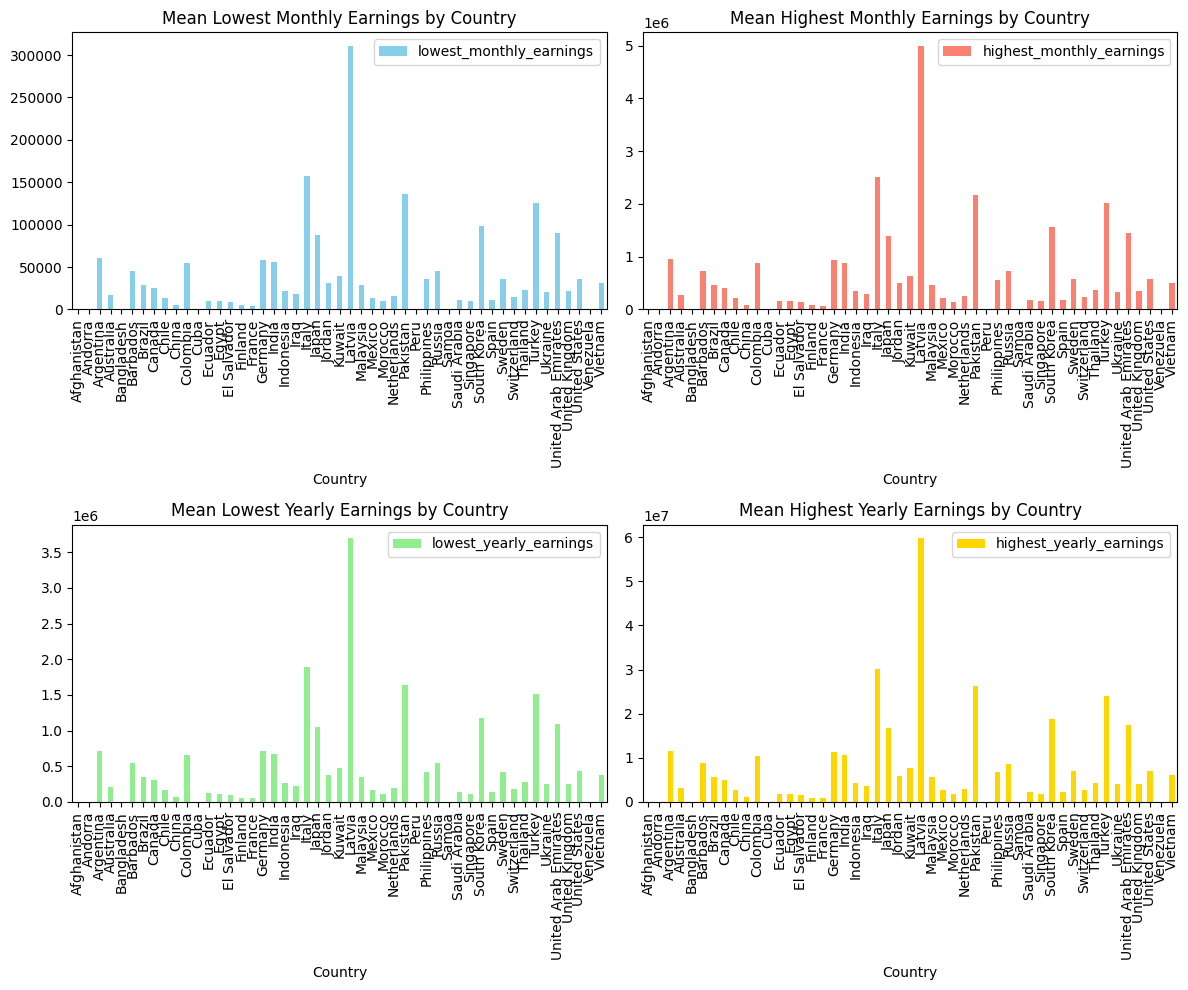

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Get unique countries
unique_countries = df[['Country']].drop_duplicates()

# Group DataFrame by country and channel type and calculate aggregate statistics for earnings
earnings_stats = df.groupby(['Country']).agg(
    lowest_monthly_earnings=('lowest_monthly_earnings', 'mean'),
    highest_monthly_earnings=('highest_monthly_earnings', 'mean'),
    lowest_yearly_earnings=('lowest_yearly_earnings', 'mean'),
    highest_yearly_earnings=('highest_yearly_earnings', 'mean')
).reset_index()

# Plotting earnings by country and channel type
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

earnings_stats.plot(kind='bar', x='Country', y='lowest_monthly_earnings', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Mean Lowest Monthly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='highest_monthly_earnings', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Mean Highest Monthly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='lowest_yearly_earnings', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Mean Lowest Yearly Earnings by Country')

earnings_stats.plot(kind='bar', x='Country', y='highest_yearly_earnings', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Mean Highest Yearly Earnings by Country')

plt.tight_layout()
plt.show()


**8.Exploring Correlations between YouTube Channel Metrics and Country-Level Factors**

correlation:-


 Each cell in the matrix represents the correlation coefficient between two variables, where:


*  1.00: Perfect positive correlation (both variables increase together)
*  0.00: No correlation
* -1.00: Perfect negative correlation (one variable increases as the other decreases)



how to interpret the correlation matrix:

**Diagonal Cells (Top-left to Bottom-right)**: These cells represent the correlation of each variable with itself, which is always 1.00 (perfect positive correlation).

**Off-diagonal Cells**: These cells represent the correlation between pairs of variables. Each cell shows the correlation coefficient between the variable in the corresponding row and the variable in the corresponding column.

**Heatmap Coloring**:-
 The color of each cell in the heatmap indicates the strength and direction of the correlation:

Darker shades (e.g., dark blue or dark red) indicate stronger correlations, either positive or negative.

Lighter shades (e.g., light blue or light red) indicate weaker correlations, closer to zero.

Positive correlations are typically represented in shades of red, while negative correlations are represented in shades of blue.



**Annotation Values:** The numbers within each cell represent the correlation coefficient. These values range from -1.00 to 1.00, indicating the strength and direction of the correlation between the corresponding pair of variables. for eg:-
A correlation coefficient of 0.08 indicates a very weak positive correlation between the two variables.

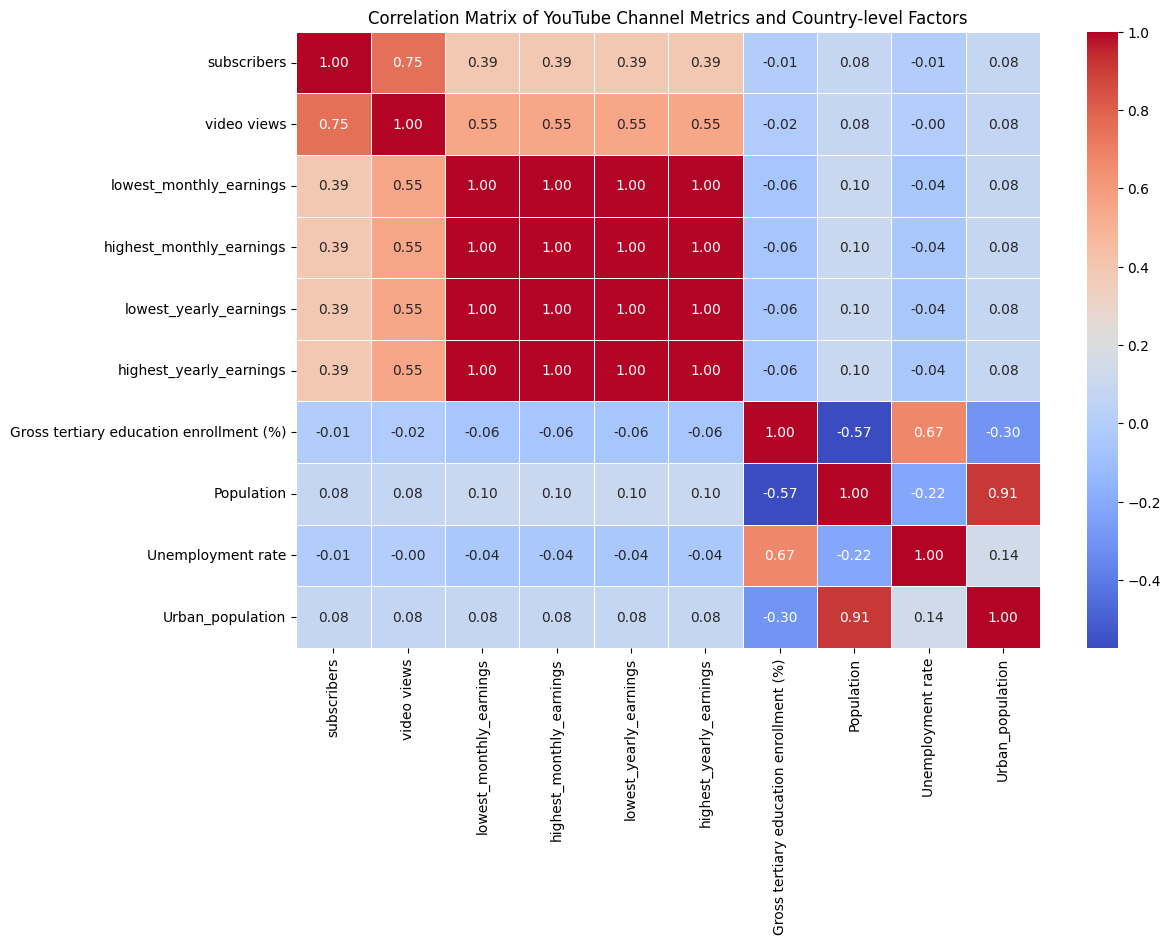

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')



# here we select columns for correlation analysis
columns_of_interest = ['subscribers', 'video views', 'lowest_monthly_earnings', 'highest_monthly_earnings',
                       'lowest_yearly_earnings', 'highest_yearly_earnings', 'Gross tertiary education enrollment (%)',
                       'Population', 'Unemployment rate', 'Urban_population']

# Compute correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of YouTube Channel Metrics and Country-level Factors')
plt.show()


**9.Analyzing the Geographic Distribution of YouTube Channel Types/Categories**

This code reads a dataset containing global YouTube statistics and creates a heatmap to visualize the distribution of channel types across different countries. It uses the Pandas library to read the CSV file and Seaborn to generate the heatmap. The heatmap is created using the `sns.heatmap()` function, which takes as input a cross-tabulation of channel types and countries. The heatmap color-codes the frequency of each channel type in each country, with darker shades indicating higher frequencies. Annotations are added to display the exact count of channels for each combination of country and channel type. Finally, the plot is customized with a title, axis labels, and rotation of the x-axis labels for better readability.

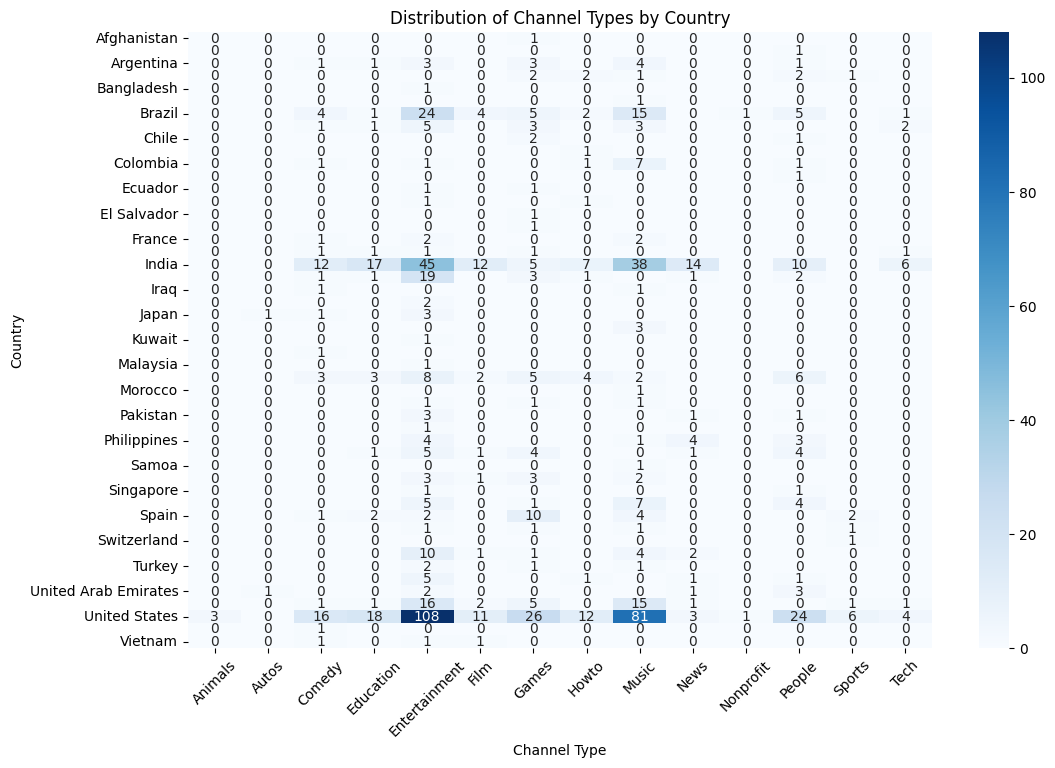

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Read the dataset
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['Country'], df['channel_type']), cmap='Blues', annot=True, fmt='d')
plt.title('Distribution of Channel Types by Country')
plt.xlabel('Channel Type')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()



**10.Channels with Most Subscribers in Each Category**

In [ ]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin1')

# Group the DataFrame by 'category' and find the maximum number of subscribers within each category
a = df.groupby(['category'])['subscribers'].max()

# Filter the DataFrame to include only rows where the 'subscribers' column matches the maximum value for each category
most = df[df['subscribers'].isin(a.values)]

# Remove rows with NaN values in the 'category' column
most = most.dropna(subset=['category'])

# Define a color scheme for the treemap
color_scheme = px.colors.qualitative.Set3

# Create a treemap visualization using Plotly Express
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='subscribers',
                 title='Channels with Most Subscribers in Each Category',
                 color_discrete_sequence=color_scheme,
                 width=1200,  # Increase the width
                 height=600)  # Increase the height
fig.update_layout(template='ggplot2')  # Set the template
fig.show()  # Display the treemap